# Thyroid Disease Detection

In [130]:
# Import Required Libararies
import time
import random
import warnings
warnings.filterwarnings("ignore")
from math import *
import operator
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 10000)
import string
import sklearn.metrics as skmet
from pprint import pprint
import joblib
import pickle
import os

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import style
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# load make_blobs to simulate data
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import KMeans
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import graphviz
from IPython.display import display


# pre-processing
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# import libraries for model validation
from imblearn.over_sampling import SMOTENC,RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import adjusted_rand_score
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pearsonr
import statistics

In [7]:
# Import Data File

data = pd.read_csv(r"C:\PROJECTS\ineurone - Thyroid Disease Detection\hypothyroid.csv")

In [8]:
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'Class'],
      dtype='object')

In [9]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [11]:
data.dtypes

age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
sick                         object
pregnant                     object
thyroid_surgery              object
I131_treatment               object
query_hypothyroid            object
query_hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                         

In [12]:
data.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,288,2,70,2,242,2,147,2,235,1,1,5,4
top,59,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,?,t,?,t,?,t,?,t,?,f,?,other,negative
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,3535,3754,3738,3676,3771,3588,3403,369,3003,769,3541,231,3385,387,3387,385,3772,3772,2201,3481


In [13]:
data.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
referral_source              0
Class                        0
dtype: int64

In [14]:
df = data.copy()

In [15]:
#checking for unique values in the various columns
for i in df:
  print("Column Name:",str(i))
  print(df[i].unique())
  print("Total count in",str(i), "is:",str(df[i].nunique()),"\n")

Column Name: age
['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' '?' '93' '92']
Total count in age is: 94 

Column Name: sex
['F' 'M' '?']
Total count in sex is: 3 

Column Name: on_thyroxine
['f' 't']
Total count in on_thyroxine is: 2 

Column Name: query_on_thyroxine
['f' 't']
Total count in query_on_thyroxine is: 2 

Column Name: on_antithyroid_medication
['f' 't']
Total count in on_antithyroid_medication is: 2 

Column Name: sick
['f' 't']
Total count in sick is: 2 

Column Name: pregnant
['f' 't']
Total count in pregnant is: 2 

Column Name: thyroid_surgery
['f' 't']
Total count i

In [16]:
# '?' Replace Nan Value
df=df.replace('?',np.nan)

In [17]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,NaN,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,NaN,f,NaN,f,NaN,other,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,NaN,t,109,t,0.91,t,120,f,NaN,other,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,NaN,f,NaN,f,NaN,other,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,NaN,SVI,negative


In [18]:
df.describe()

,TBG
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   object 
 1   sex                        3622 non-null   object 
 2   on_thyroxine               3772 non-null   object 
 3   query_on_thyroxine         3772 non-null   object 
 4   on_antithyroid_medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid_surgery            3772 non-null   object 
 8   I131_treatment             3772 non-null   object 
 9   query_hypothyroid          3772 non-null   object 
 10  query_hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

In [20]:
df.isnull().sum()

age                             1
sex                           150
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           369
T3_measured                     0
T3                            769
TT4_measured                    0
TT4                           231
T4U_measured                    0
T4U                           387
FTI_measured                    0
FTI                           385
TBG_measured                    0
TBG                          3772
referral_source                 0
Class         

<Axes: xlabel='None', ylabel='None'>

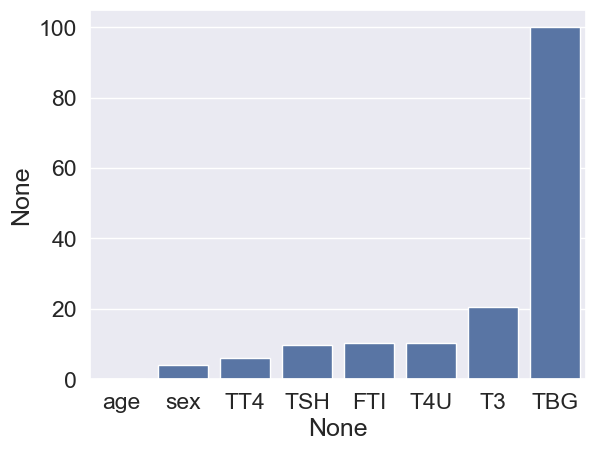

In [21]:
#checking percentage of null in data using histogram
percent_null = 100 * df.isnull().sum() / len(df)
percent_null = percent_null[percent_null > 0].sort_values()
sns.barplot(x=percent_null.index, y=percent_null)

In [22]:
df.drop('TBG',inplace=True,axis=1)

<Axes: xlabel='None', ylabel='None'>

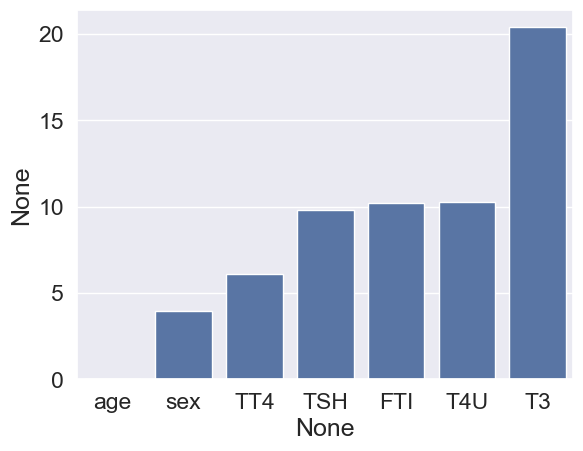

In [23]:
#since TBG col is entirely null ,we discard it
percent_null = 100 * df.isnull().sum() / len(df)
percent_null = percent_null[percent_null > 0].sort_values()
sns.barplot(x=percent_null.index, y=percent_null)

In [24]:
# Drop TT4,TSH ,FTI,T4U,T3 Columns 
drop_columns = ['TT4','TSH','FTI','T4U','T3']
df.drop(drop_columns,inplace = True,axis=1)

<Axes: xlabel='None', ylabel='None'>

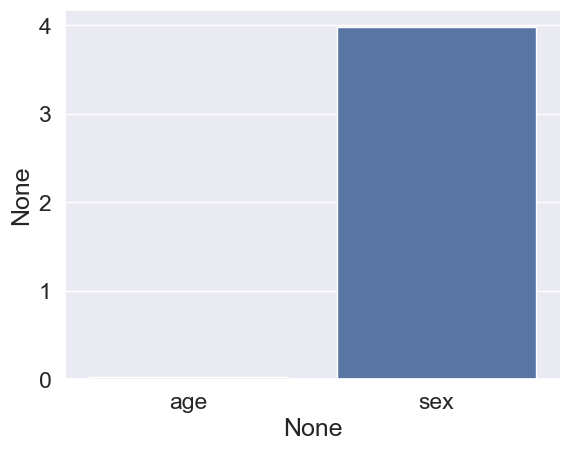

In [25]:
percent_null = 100 * df.isnull().sum() / len(df)
percent_null = percent_null[percent_null > 0].sort_values()
sns.barplot(x=percent_null.index, y=percent_null)

In [26]:
# Removing rows HAVING NAN VALUES IN age AND sex
remove_rows = ['age','sex']
for i in remove_rows:
  df = df[df[i].notna()]

In [27]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,t,t,f,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,f,f,f,other,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,t,t,t,f,other,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,f,f,f,other,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,t,t,f,SVI,negative


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3621 entries, 0 to 3771
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3621 non-null   object
 1   sex                        3621 non-null   object
 2   on_thyroxine               3621 non-null   object
 3   query_on_thyroxine         3621 non-null   object
 4   on_antithyroid_medication  3621 non-null   object
 5   sick                       3621 non-null   object
 6   pregnant                   3621 non-null   object
 7   thyroid_surgery            3621 non-null   object
 8   I131_treatment             3621 non-null   object
 9   query_hypothyroid          3621 non-null   object
 10  query_hyperthyroid         3621 non-null   object
 11  lithium                    3621 non-null   object
 12  goitre                     3621 non-null   object
 13  tumor                      3621 non-null   object
 14  hypopituitary

In [29]:
df.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
T3_measured                  0
TT4_measured                 0
T4U_measured                 0
FTI_measured                 0
TBG_measured                 0
referral_source              0
Class                        0
dtype: int64

In [30]:
# Columns values Change in binary
binary = ['on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured',
       'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured',
       'TBG_measured']

In [31]:
# changing coliumns values to f as 0 and t as 1
for column in binary:
  df[column] = df[column].map({'f' : 0, 't' : 1})

In [32]:
# change Sex Column value F as 0 and M as 1
df['sex'] = df['sex'].map({'F' : 0, 'M' : 1})

In [33]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,referral_source,Class
0,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,SVHC,negative
1,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,other,negative
2,46,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,other,negative
3,70,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,other,negative
4,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,other,negative
3768,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,SVI,negative
3769,74,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0,other,negative
3770,72,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,SVI,negative


In [34]:
# Check referral_source Unique Values
df['referral_source'].unique()

array(['SVHC', 'other', 'SVI', 'SVHD', 'STMW'], dtype=object)

In [35]:
# Create dummy variables
df = pd.get_dummies(df, columns=['referral_source'])

In [36]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,negative,False,True,False,False,False
1,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,negative,False,False,False,False,True
2,46,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,negative,False,False,False,False,True
3,70,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,negative,False,False,False,False,True
4,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,negative,False,False,False,True,False


In [37]:
# Convert 0 and 1 format, True as 1 And False as 0. 
df = df.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

In [38]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,negative,0,1,0,0,0
1,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,negative,0,0,0,0,1
2,46,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,negative,0,0,0,0,1
3,70,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,negative,0,0,0,0,1
4,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,negative,0,0,0,1,0


In [39]:
# Check Class Unique Value
df['Class'].unique()

array(['negative', 'compensated_hypothyroid', 'primary_hypothyroid',
       'secondary_hypothyroid'], dtype=object)

In [40]:
#checking the various types of thyroids Value Count
df['Class'].value_counts()

Class
negative                   3341
compensated_hypothyroid     187
primary_hypothyroid          91
secondary_hypothyroid         2
Name: count, dtype: int64

In [41]:
# Lable Encoder For class Column
encode = LabelEncoder().fit(df['Class'])

In [42]:
# Transform 
df['Class'] = encode.transform(df['Class'])

In [43]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,0,1,0,0,0
1,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1
2,46,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,1
3,70,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1
4,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,0,0,0,1,0


In [44]:
df['Class'].value_counts()

Class
1    3341
0     187
2      91
3       2
Name: count, dtype: int64

### Visualization Using Python

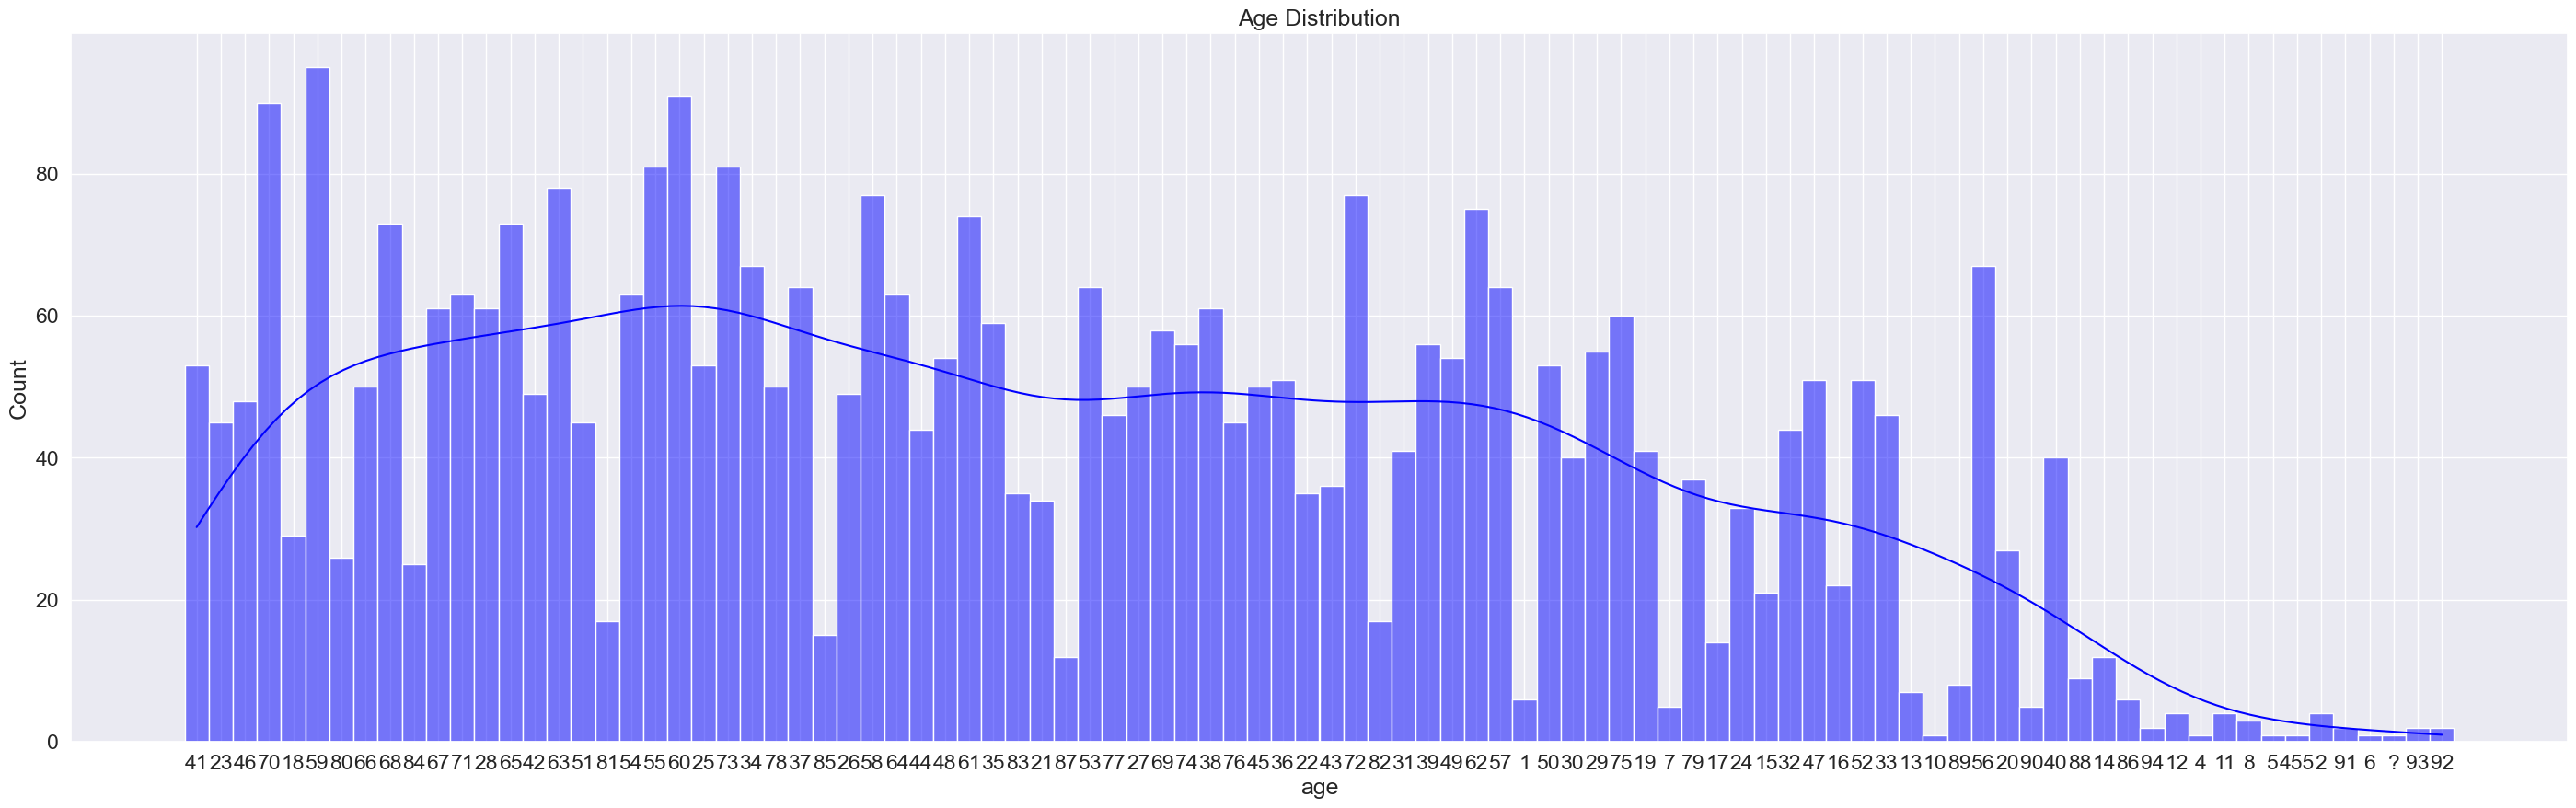

In [45]:
# Distribution of age
plt.figure(figsize=(35, 10))
sns.histplot(data['age'], kde=True, color='blue')
plt.title('Age Distribution')
plt.show()

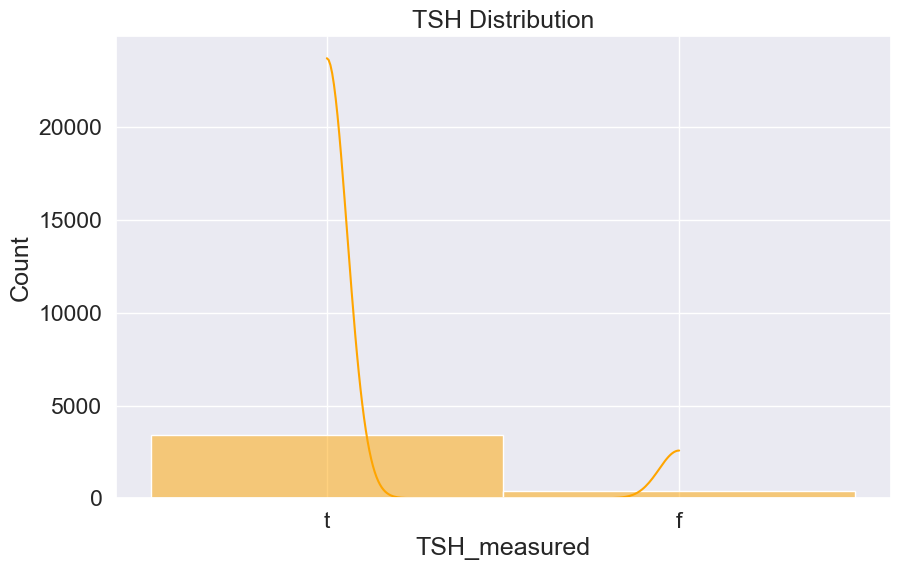

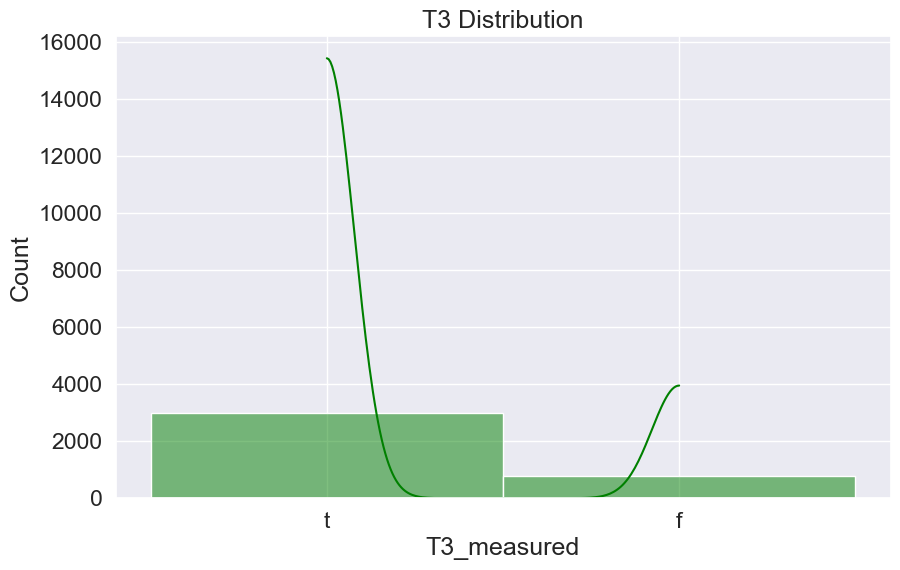

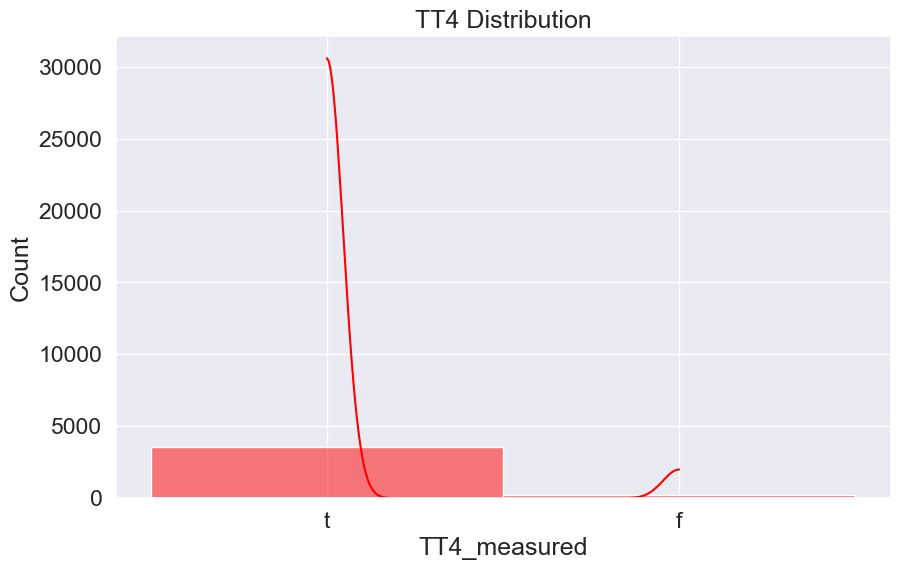

In [46]:
# Distribution of TSH, T3, TT4
plt.figure(figsize=(10, 6))
sns.histplot(data['TSH_measured'], kde=True, color='orange')
plt.title('TSH Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['T3_measured'], kde=True, color='green')
plt.title('T3 Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['TT4_measured'], kde=True, color='red')
plt.title('TT4 Distribution')
plt.show()

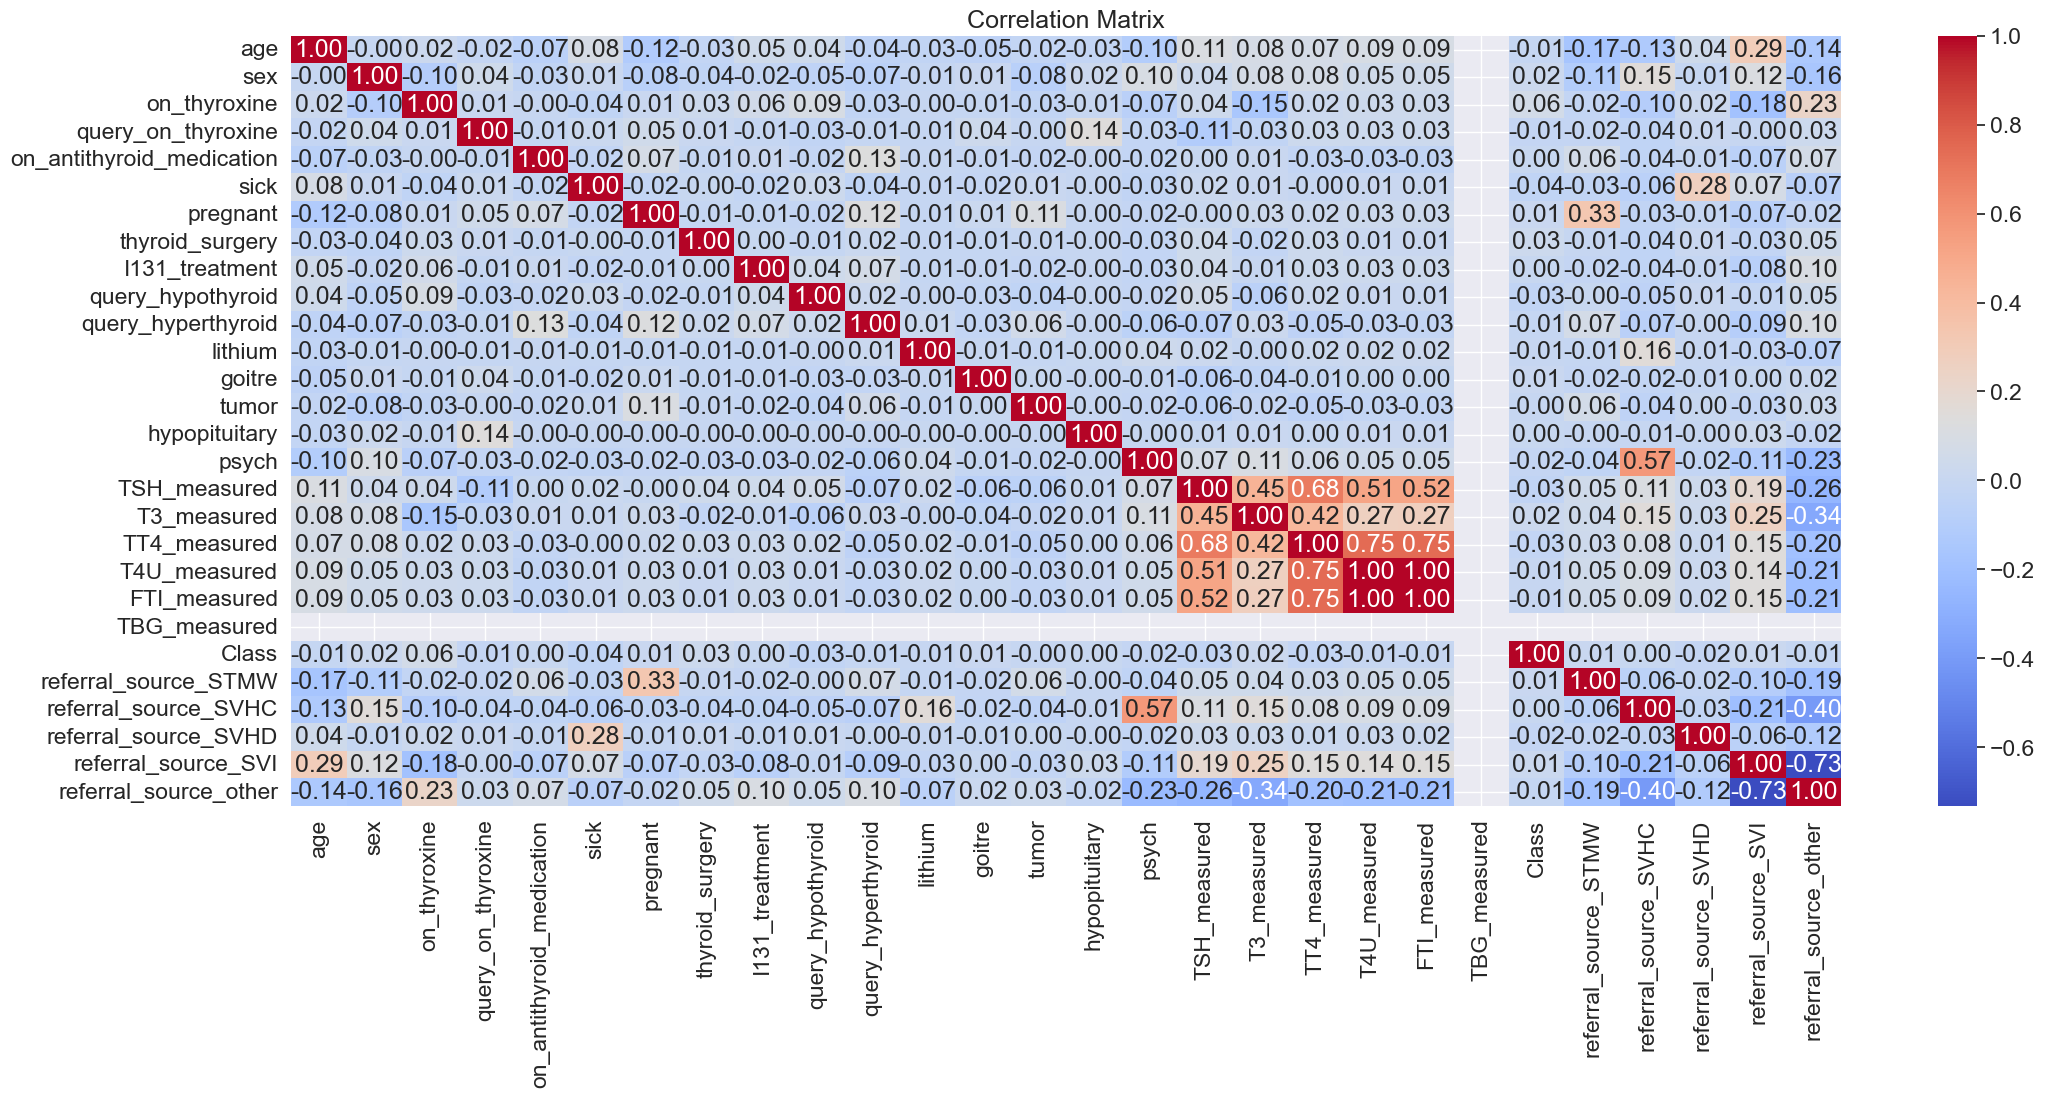

In [47]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(25, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


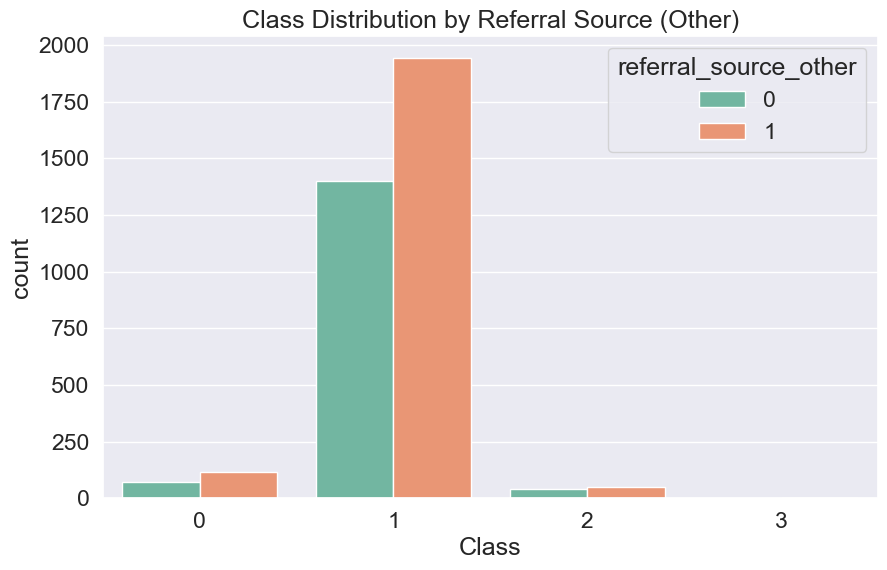

In [48]:
# Distribution of referral sources
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Class', hue='referral_source_other', palette='Set2')
plt.title('Class Distribution by Referral Source (Other)')
plt.show()


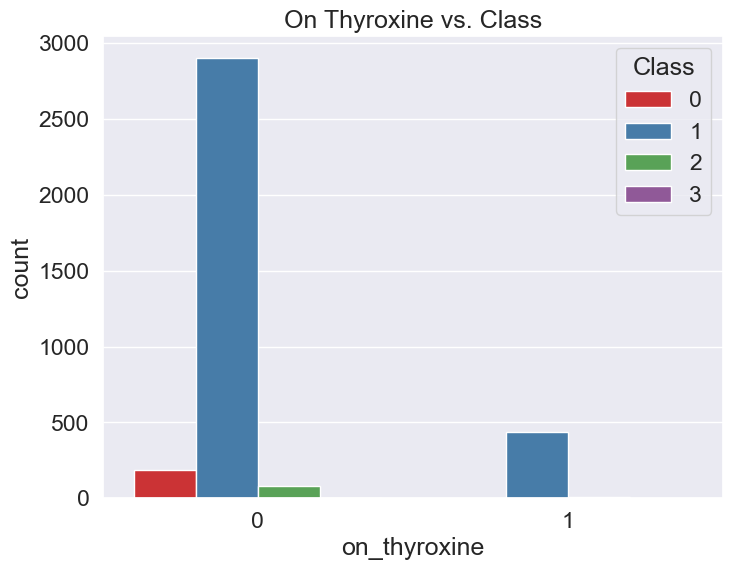

In [49]:
# Relationship between 'on_thyroxine' and 'Class'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='on_thyroxine', hue='Class', palette='Set1')
plt.title('On Thyroxine vs. Class')
plt.show()

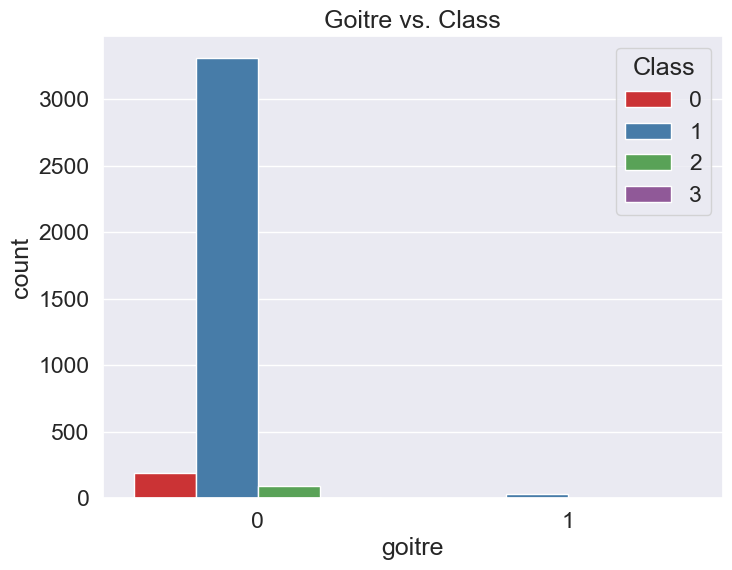

In [50]:
# Relationship between 'goitre' and 'Class'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='goitre', hue='Class', palette='Set1')
plt.title('Goitre vs. Class')
plt.show()

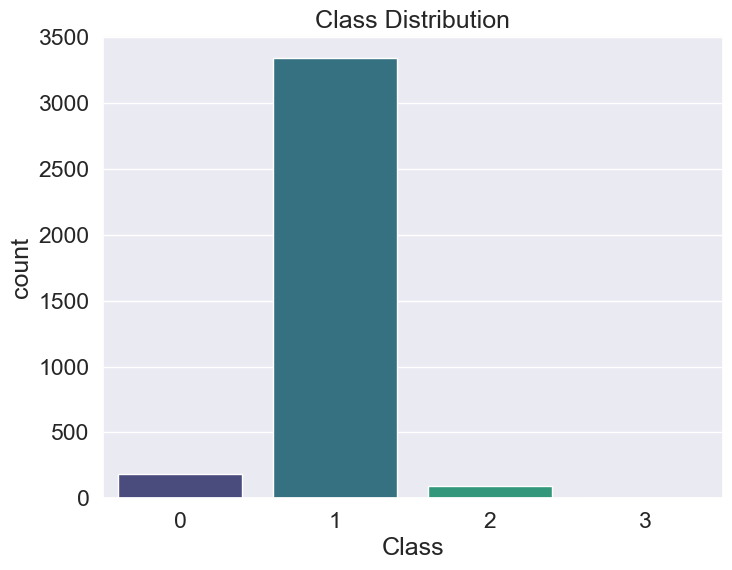

In [51]:
# Check Classes using histogram
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df, palette='viridis')
plt.title('Class Distribution')
plt.show()

## Machine Learning Model Building

#### There Are Imbalance Classe data. Need to Balance Class data.

In [52]:
x = df.drop(['Class'],axis=1)
y = df['Class']
r = RandomOverSampler()
x_sample,y_sample  = r.fit_resample(x,y)

In [53]:
x_sample = pd.DataFrame(data = x_sample, columns = x.columns)
x_sample.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,0,0,0
1,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1
2,46,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1
3,70,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1
4,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,1,0


In [54]:
x_sample.shape

(13364, 27)

In [55]:
y_sample

0        1
1        1
2        1
3        1
4        1
        ..
13359    3
13360    3
13361    3
13362    3
13363    3
Name: Class, Length: 13364, dtype: int32

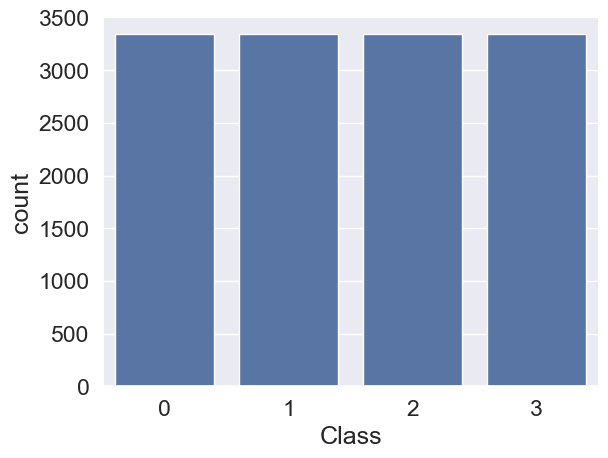

In [56]:
sns.countplot(x=y_sample)
plt.show()

In [57]:
# Split Data
x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size=0.2, random_state=2)

### Logistic Regression Model

In [58]:
# LogisticRegression
LRM = LogisticRegression()

In [59]:
# Fit Model
LRM.fit(x_train, y_train)

LogisticRegression()

In [60]:
# Prediction
y_pred_lrm = LRM.predict(x_test)

In [61]:
# Check Accuracy
lrm_acc = accuracy_score(y_test, y_pred_lrm)
print("Logistic Regression model accuracy (in %):", lrm_acc*100)

Logistic Regression model accuracy (in %): 57.23905723905723


In [62]:
# Confusion Matrix
print(skmet.confusion_matrix(y_test, y_pred_lrm))

[[259  77 184 136]
 [131 281 195  86]
 [ 93  58 316 183]
 [  0   0   0 674]]


In [63]:
print(classification_report(y_test, y_pred_lrm))

              precision    recall  f1-score   support

           0       0.54      0.39      0.45       656
           1       0.68      0.41      0.51       693
           2       0.45      0.49      0.47       650
           3       0.62      1.00      0.77       674

    accuracy                           0.57      2673
   macro avg       0.57      0.57      0.55      2673
weighted avg       0.57      0.57      0.55      2673



### Hyper Parameter Tuning For Logistic Regression Model

In [64]:
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space} 

In [65]:
# Instantiating logistic regression classifier
lrm_grid = LogisticRegression()

In [66]:
# Instantiating the GridSearchCV object
lrm_grid_cv = GridSearchCV(lrm_grid, param_grid, cv = 5)

In [67]:
# Fit Hyper Parameter Tuning fit in data
lrm_grid_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [68]:
# The best set of parameter values
lrm_grid_cv.best_params_

{'C': 0.4393970560760795}

In [69]:
# Model with best parameter values
lrm_grid_best = lrm_grid_cv.best_estimator_

In [70]:
# Prediction on Test Data
lrm_grid_preds = lrm_grid_best.predict(x_test)

In [108]:
# Check Accuracy
lrm_acc_ = accuracy_score(y_test, lrm_grid_preds)
print("Logistic Regression Hyperparameter model accuracy (in %):", lrm_acc_*100)

Logistic Regression Hyperparameter model accuracy (in %): 57.388701833146285


In [72]:
# Confusion Matrix
print(skmet.confusion_matrix(y_test, lrm_grid_preds))

[[258  80 172 146]
 [127 278 200  88]
 [ 84  59 324 183]
 [  0   0   0 674]]


In [73]:
print(classification_report(y_test, lrm_grid_preds))

              precision    recall  f1-score   support

           0       0.55      0.39      0.46       656
           1       0.67      0.40      0.50       693
           2       0.47      0.50      0.48       650
           3       0.62      1.00      0.76       674

    accuracy                           0.57      2673
   macro avg       0.58      0.57      0.55      2673
weighted avg       0.58      0.57      0.55      2673



### Decision Tree Model

In [74]:
# Decision Tree Model
DTM = DecisionTreeClassifier(criterion = 'entropy')

In [75]:
# Decision Tree Model Fit in data
DTM.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [76]:
# Prediction
y_pred_dtm = DTM.predict(x_test)

In [109]:
# Check Accuracy
dtm_acc = accuracy_score(y_test, y_pred_dtm)
print("Decision Tree model accuracy (in %):", dtm_acc*100)

Decision Tree model accuracy (in %): 88.62701084923307


In [78]:
# Confusion Matrix
print(skmet.confusion_matrix(y_test, y_pred_dtm))

[[561   0  93   2]
 [113 511  67   2]
 [ 27   0 623   0]
 [  0   0   0 674]]


In [79]:
print(classification_report(y_test, y_pred_dtm))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       656
           1       1.00      0.74      0.85       693
           2       0.80      0.96      0.87       650
           3       0.99      1.00      1.00       674

    accuracy                           0.89      2673
   macro avg       0.90      0.89      0.89      2673
weighted avg       0.90      0.89      0.89      2673



### Hyper Parameter Tuning For Decision Tree Model

In [80]:
# hyper parameter optimizer
# create a dictionary of all hyperparameters to be experimented
param_grid_dtm = {'criterion':['gini','entropy'], 'max_depth': np.arange(3, 15)}

In [81]:
# Decision tree model
dtm_grid = DecisionTreeClassifier()

In [82]:
# GridsearchCV with cross-validation to perform experiments with parameters set
dtm_gscv = GridSearchCV(dtm_grid, param_grid_dtm, cv = 5, scoring = 'accuracy',
                          return_train_score = False, verbose = 1)

In [83]:
# Train the model with gridsearchcv optimization technique
dtm_gscv.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='accuracy', verbose=1)

In [84]:
# The best set of parameter values
dtm_gscv.best_params_

{'criterion': 'gini', 'max_depth': 14}

In [85]:
# Model with best parameter values
DTM_best = dtm_gscv.best_estimator_

In [ ]:
# Prediction on Test Data
dtm_preds = DTM_best.predict(x_test)

In [110]:
# Check Accuracy
dtm_acc_ = accuracy_score(y_test, dtm_preds)
print("Decision Tree Hyperparameter model accuracy (in %):", dtm_acc_*100)

Decision Tree Hyperparameter model accuracy (in %): 81.85559296670408


In [88]:
# Confusion Matrix
print(skmet.confusion_matrix(y_test, dtm_preds))

[[505  17 132   2]
 [156 431 104   2]
 [ 58  14 578   0]
 [  0   0   0 674]]


In [89]:
print(classification_report(y_test, dtm_preds))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73       656
           1       0.93      0.62      0.75       693
           2       0.71      0.89      0.79       650
           3       0.99      1.00      1.00       674

    accuracy                           0.82      2673
   macro avg       0.83      0.82      0.82      2673
weighted avg       0.84      0.82      0.82      2673



### Random Forest Model

In [90]:
# Random Forest Model
rf_model = RandomForestClassifier()

In [91]:
# Model Fit in Data
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [92]:
# Prediction on Test Data
rf_preds = rf_model.predict(x_test)

In [111]:
# Check Accuracy
rf_acc = accuracy_score(y_test, rf_preds)
print("Random Forest model accuracy (in %):", rf_acc*100)

Random Forest model accuracy (in %): 89.18817807706696


In [94]:
# Confusion Matrix
print(skmet.confusion_matrix(y_test, rf_preds))

[[561   0  93   2]
 [103 526  62   2]
 [ 27   0 623   0]
 [  0   0   0 674]]


In [96]:
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       656
           1       1.00      0.76      0.86       693
           2       0.80      0.96      0.87       650
           3       0.99      1.00      1.00       674

    accuracy                           0.89      2673
   macro avg       0.90      0.89      0.89      2673
weighted avg       0.90      0.89      0.89      2673



### Hyper Parameter tuning For Random Forest Model

In [97]:
# Hyper Parameter Optimizer
rf_param_grid = {'n_estimators': [25, 50, 100, 150], 'max_features': ['sqrt', 'log2'], 'max_depth': [3, 6, 9], 'max_leaf_nodes': [3, 6, 9]} 

In [98]:
# Hyperparameter optimization with GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_model, param_grid = rf_param_grid, cv = 10, verbose = 1, n_jobs = -1)

In [99]:
# Train the model with gridsearchcv optimization technique
rf_Grid.fit(x_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]},
             verbose=1)

In [103]:
# The best set of parameter values
rf_Grid.best_params_

{'max_depth': 9,
 'max_features': 'sqrt',
 'max_leaf_nodes': 9,
 'n_estimators': 150}

In [104]:
# Model with best parameter values
rf_best = rf_Grid.best_estimator_

In [105]:
# Prediction on Test Data
rfg_preds_ = rf_best.predict(x_test)

In [107]:
# Check Accuracy
rf_acc_ = accuracy_score(y_test, rfg_preds_)
print("Random Forest Hyperparameter model accuracy (in %):", rf_acc_*100)

Random Forest Hyperparameter model accuracy (in %): 61.65357276468387


In [113]:
# Confusion Matrix
print(skmet.confusion_matrix(y_test, rfg_preds_))

[[310  62 249  35]
 [193 262 222  16]
 [167  62 402  19]
 [  0   0   0 674]]


In [114]:
print(classification_report(y_test, rfg_preds_))

              precision    recall  f1-score   support

           0       0.46      0.47      0.47       656
           1       0.68      0.38      0.49       693
           2       0.46      0.62      0.53       650
           3       0.91      1.00      0.95       674

    accuracy                           0.62      2673
   macro avg       0.63      0.62      0.61      2673
weighted avg       0.63      0.62      0.61      2673



### Support Vector Machine (SVM) Model

In [115]:
# Build the model
svm_model = SVC()

In [116]:
# Trained the model
svm_model.fit(x_train,y_train)

SVC()

In [117]:
# Prediction on Test Data
y_pred_svm = svm_model.predict(x_test)

In [118]:
# Check Accuracy
svm_acc = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine (SVM) model accuracy (in %):", svm_acc*100)

Support Vector Machine (SVM) model accuracy (in %): 48.073325851103625


In [119]:
# Confusion Matrix
print(skmet.confusion_matrix(y_test, y_pred_svm))

[[264 126 128 138]
 [246 171 145 131]
 [196 141 176 137]
 [  0   0   0 674]]


In [120]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.37      0.40      0.39       656
           1       0.39      0.25      0.30       693
           2       0.39      0.27      0.32       650
           3       0.62      1.00      0.77       674

    accuracy                           0.48      2673
   macro avg       0.45      0.48      0.44      2673
weighted avg       0.45      0.48      0.45      2673



### Navi Bayes Model 

In [121]:
# Build Model
gnb = GaussianNB()

In [122]:
# Fit Model in Data
gnb.fit(x_train, y_train)

GaussianNB()

In [123]:
# Predict test data
gnb_pred = gnb.predict(x_test)

In [124]:
# Check Accuracy
gnb_acc = accuracy_score(y_test, gnb_pred)
print("Navi Bayes GaussianNB model accuracy (in %):", gnb_acc*100)

Navi Bayes GaussianNB model accuracy (in %): 45.0430228208006


In [125]:
# Confusion Matrix
print(skmet.confusion_matrix(y_test, gnb_pred))

[[ 82   5 377 192]
 [115  85 355 138]
 [  4   8 363 275]
 [  0   0   0 674]]


In [126]:
print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       0.41      0.12      0.19       656
           1       0.87      0.12      0.21       693
           2       0.33      0.56      0.42       650
           3       0.53      1.00      0.69       674

    accuracy                           0.45      2673
   macro avg       0.53      0.45      0.38      2673
weighted avg       0.54      0.45      0.38      2673



### The Random Forest Model is Performs the High Accuracy Score is 89.19%.

In [131]:
# Save the model to a pkl file
pickle.dump(rf_model,open('rf_model.pkl','wb'))
svm_model=pickle.load(open('rf_model.pkl','rb'))